# Dimensionality Reduction

In [10]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

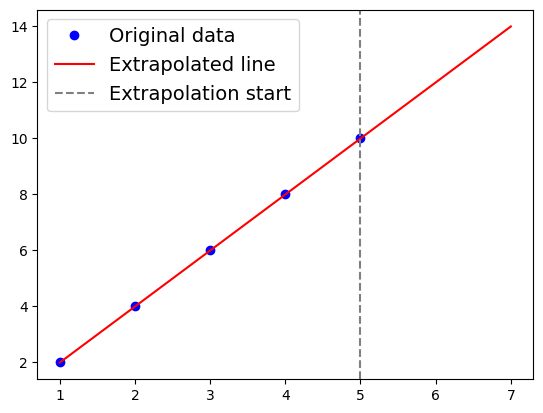

In [11]:
# Extrapolation visualization

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Fit a linear model
coefficients = np.polyfit(x, y, 1)  # 1 denotes a linear fit
polynomial = np.poly1d(coefficients)

# Extrapolate beyond the known x values
x_new = np.linspace(1, 7, 100)  # Extend x-values to 7
y_new = polynomial(x_new)

# Plotting
plt.plot(x, y, 'bo', label='Original data')
plt.plot(x_new, y_new, 'r-', label='Extrapolated line')
plt.axvline(5, color='gray', linestyle='--', label='Extrapolation start')
plt.legend()
plt.show()


# Projection 
`IRL training instances not spread evenly...(mostly all close to each other) so all lie within a low dimension subscape... looking at figures below it's easily seen that if all points(red) projected perpendicularly on this subspace of blue (to which they are all close to) it can be represented as the second image [for exact mapping try to match top right of upper with bottom right of lower and you'll see the pattern ] `
![alt text](Projection.png)
![alt text](<2D - 3D.png>)

# Challeneg for reader(self duh)
`This image will answer most question of why instantly reducing dimension is not preferred.... just think `

![alt text](Think.png)

# PCA 
`For each principal component, PCA finds a zero-centered unit vector pointing in the
direction of the PC. Since two opposing unit vectors lie on the same axis, the direction of
the unit vectors returned by PCA is not stable: if you perturb the training set slightly and
run PCA again, the unit vectors may point in the opposite direction as the original vectors.
However, they will generally still lie on the same axes. In some cases, a pair of unit
vectors may even rotate or swap (if the variances along these two axes are very close), but
the plane they define will generally remain the same`

# LLE (Locally Linear Embedding)


***1. Measures the linear relation b/w each instances and it's nearest neighbous***

***2. look for a low dimensional representation of the training set where these relations are preserved***

In [12]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding


X_swiss , t = make_swiss_roll(n_samples=1000,noise=0.2,random_state = 42)

In [13]:
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10,random_state=42)

X_unrolled = lle.fit_transform(X_swiss)

`The variable t is a 1D NumPy array containing the position of each instance
along the rolled axis of the Swiss roll. We don’t use it in this example, but it
can be used as a target for a nonlinear regression task.`

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Text(0.5, 1.0, 'Unrolled swiss roll using LLE')

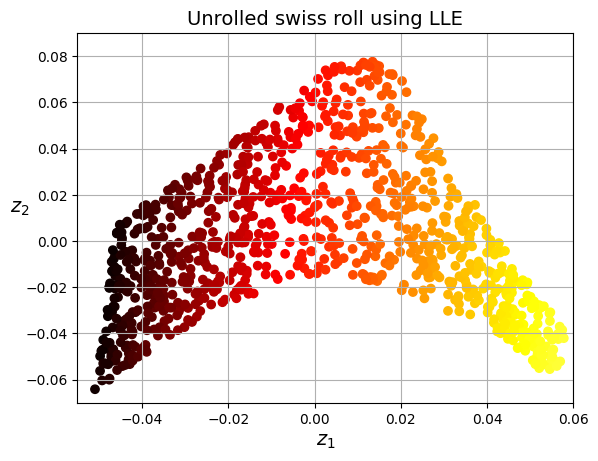

In [15]:
# copy code from book – this cell generates and saves Figure 8–10

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using LLE")
